In [1]:
#@title Installing Libarries
!pip install pandas matplotlib numpy scikit-learn statsmodels seaborn

In [2]:
!pip install pmdarima

In [3]:
#@title Libraries Import
import numpy as np, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [5]:
#@title Panda Import
import pandas as pd


In [6]:
#@title Loading Dataset Data.CSV
df=pd.read_csv("data.csv")

In [7]:
df

,datetime,open,high,low,close,volume,reserve,funding_rates,mvrv,nrpl,nupl,stock_to_flow_reversion,sth_sopr,signal,RSI,9_ema,21_ema,50_ema,200_ema,Fear_and_Greed_Index
0,2020-07-16,9190.80,9216.02,9005.00,9130.11,8765.698589,2.889262e+06,0.009332,1.563972,-3.694023e+06,0.360602,0.421011,0.997131,none,47.108800,9214.535081,9196.119258,9524.945856,9671.528810,43
1,2020-07-17,9130.93,9182.99,9054.99,9154.29,6423.747162,2.889943e+06,0.007262,1.568555,3.367513e+05,0.362471,0.366354,0.999726,none,48.843088,9202.486065,9206.292278,9560.413230,9718.271795,41
2,2020-07-18,9154.29,9210.00,9122.65,9175.85,4121.626974,2.890642e+06,0.004125,1.572507,7.637219e+06,0.364073,0.404649,1.000724,buy,50.404638,9197.158852,9216.465298,9595.880603,9765.014781,44
3,2020-07-19,9175.83,9245.03,9105.37,9212.87,3520.072476,2.892067e+06,0.007809,1.579355,2.053120e+07,0.366830,0.409607,1.000859,none,53.054470,9200.301081,9226.638318,9631.347977,9811.757766,41
4,2020-07-20,9214.01,9223.51,9131.00,9161.05,5815.330842,2.891858e+06,0.010244,1.568483,7.103351e+06,0.362441,0.437860,1.000647,none,49.099864,9192.450865,9236.811338,9666.815351,9858.500751,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2023-02-01,23127.15,23813.57,22760.00,23735.97,20292.224170,2.228658e+06,0.010046,1.197895,3.665064e+08,0.165202,1.053647,1.043648,none,73.827696,23052.123348,21916.623693,20118.284733,21237.270436,56
931,2023-02-02,23735.97,24262.18,23367.87,23493.84,16368.921383,2.225632e+06,0.017552,1.185242,1.677386e+08,0.156290,1.103838,1.027135,none,70.357821,23140.466679,22060.006994,20250.659449,21259.723865,60
932,2023-02-03,23497.29,23720.00,23208.01,23433.54,14215.668430,2.221115e+06,0.012482,1.181964,1.003611e+08,0.153951,1.009916,1.021413,none,69.481991,23199.081343,22184.873631,20375.478294,21281.353876,60
933,2023-02-04,23433.47,23589.67,23257.71,23328.87,3567.130075,2.219863e+06,0.007240,1.176299,1.410151e+08,0.149876,1.028088,1.028341,none,67.901909,23225.039074,22288.873301,20491.297577,21301.727171,58


In [8]:
print(df.columns)

Index(['datetime', 'open', 'high', 'low', 'close', 'volume', 'reserve',
       'funding_rates', 'mvrv', 'nrpl', 'nupl', 'stock_to_flow_reversion',
       'sth_sopr', 'signal', 'RSI', '9_ema', '21_ema', '50_ema', '200_ema',
       'Fear_and_Greed_Index'],
      dtype='object')


In [12]:
#@title Check for Missing Value and fill the mean
# Check for missing values
print(df.isnull().sum())


datetime                   0
open                       0
high                       0
low                        0
close                      0
volume                     0
reserve                    0
funding_rates              0
mvrv                       0
nrpl                       0
nupl                       0
stock_to_flow_reversion    0
sth_sopr                   0
signal                     0
RSI                        0
9_ema                      0
21_ema                     0
50_ema                     0
200_ema                    0
Fear_and_Greed_Index       0
dtype: int64


In [9]:
#@title Summary Statistic
# Exclude non-numerical columns from the DataFrame for summary statistics and correlation
numerical_df = df.select_dtypes(include=[np.number])

# Summary statistics
print(numerical_df.describe())

# Correlation matrix
print(numerical_df.corr())



               open          high           low         close         volume  \
count    935.000000    935.000000    935.000000    935.000000     935.000000   
mean   32854.990235  33748.030417  31841.441326  32869.649166   19776.787469   
std    15586.619424  16026.828089  15051.951866  15570.876889   12739.460780   
min     9130.930000   9182.990000   9005.000000   9130.110000    3211.704593   
25%    19239.850000  19554.870000  18850.245000  19258.600000   11166.544857   
50%    33077.430000  34231.540000  31432.190000  33080.660000   16961.108288   
75%    45709.475000  47058.655000  44145.240000  45705.135000   24086.969086   
max    67554.130000  69000.000000  66261.790000  67554.840000  119633.961941   

            reserve  funding_rates        mvrv          nrpl        nupl  \
count  9.350000e+02     935.000000  935.000000  9.350000e+02  935.000000   
mean   2.655477e+06       0.010833    1.887077  2.638039e+08    0.364061   
std    1.542206e+05       0.023959    0.773880  9.6

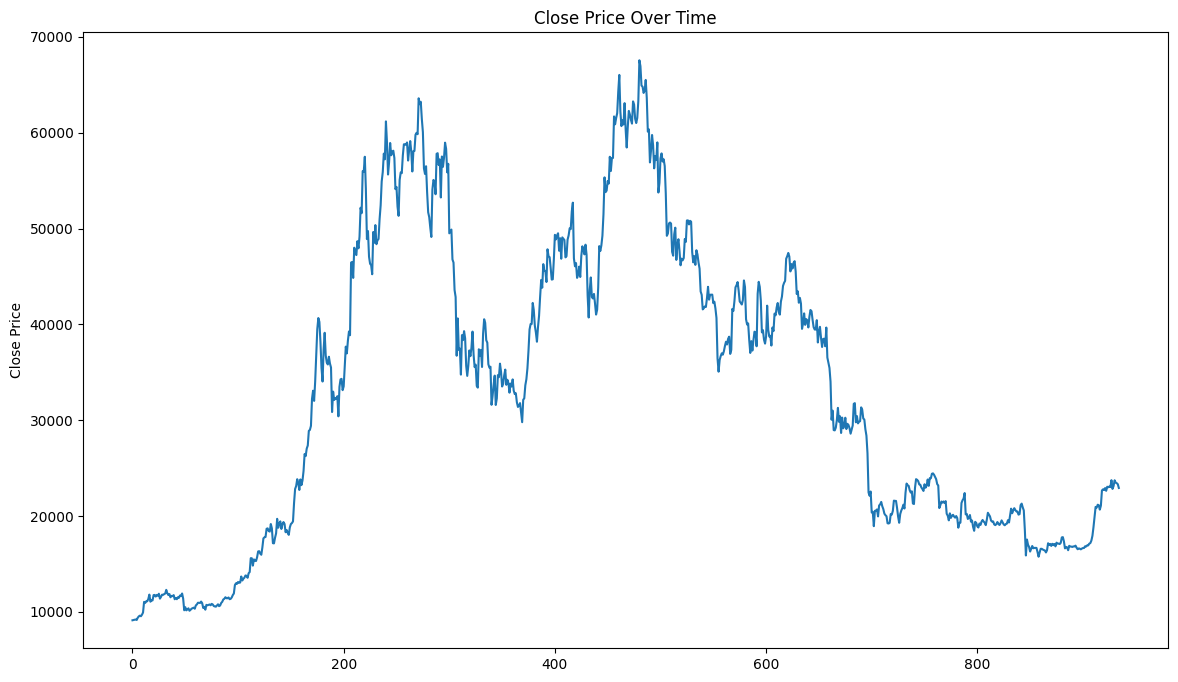

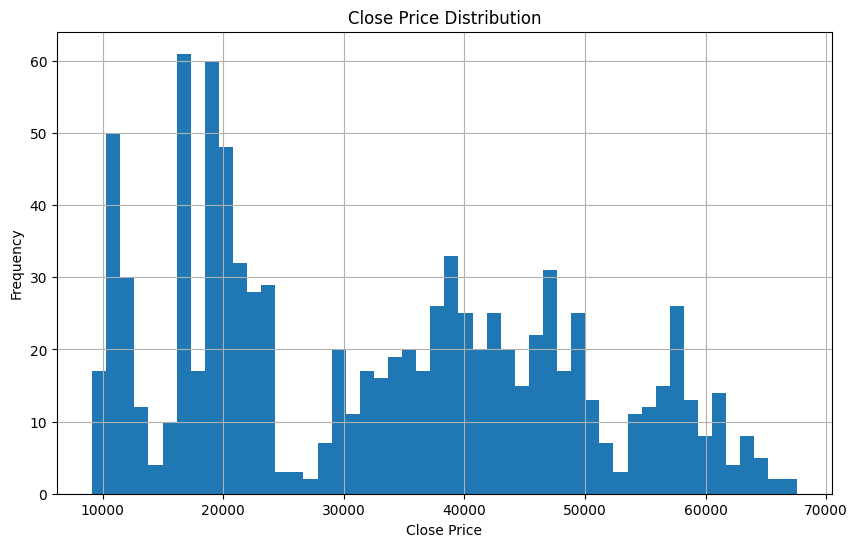

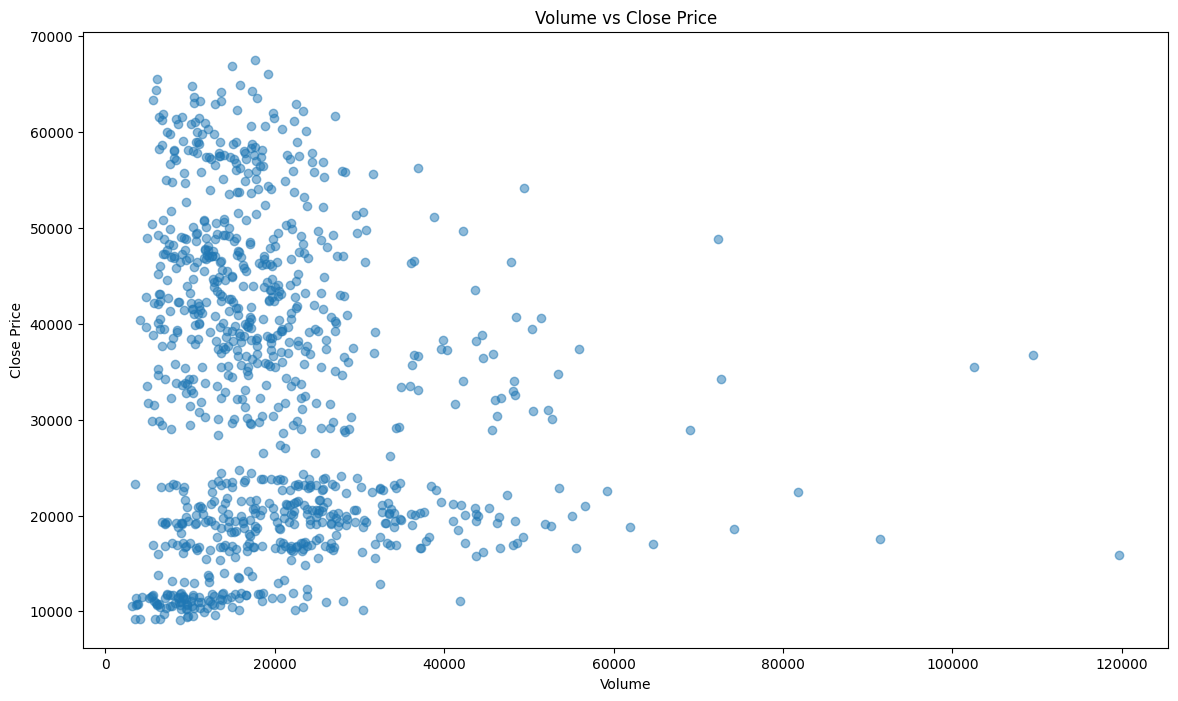

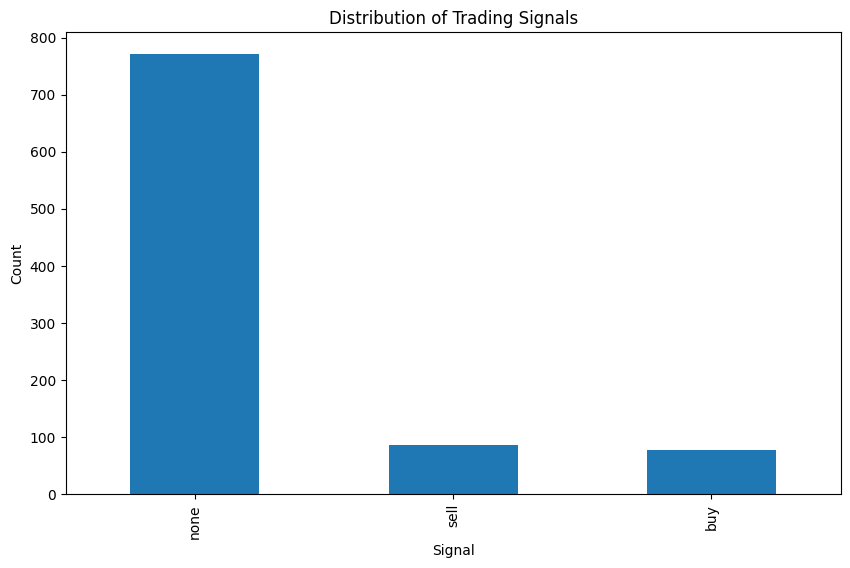

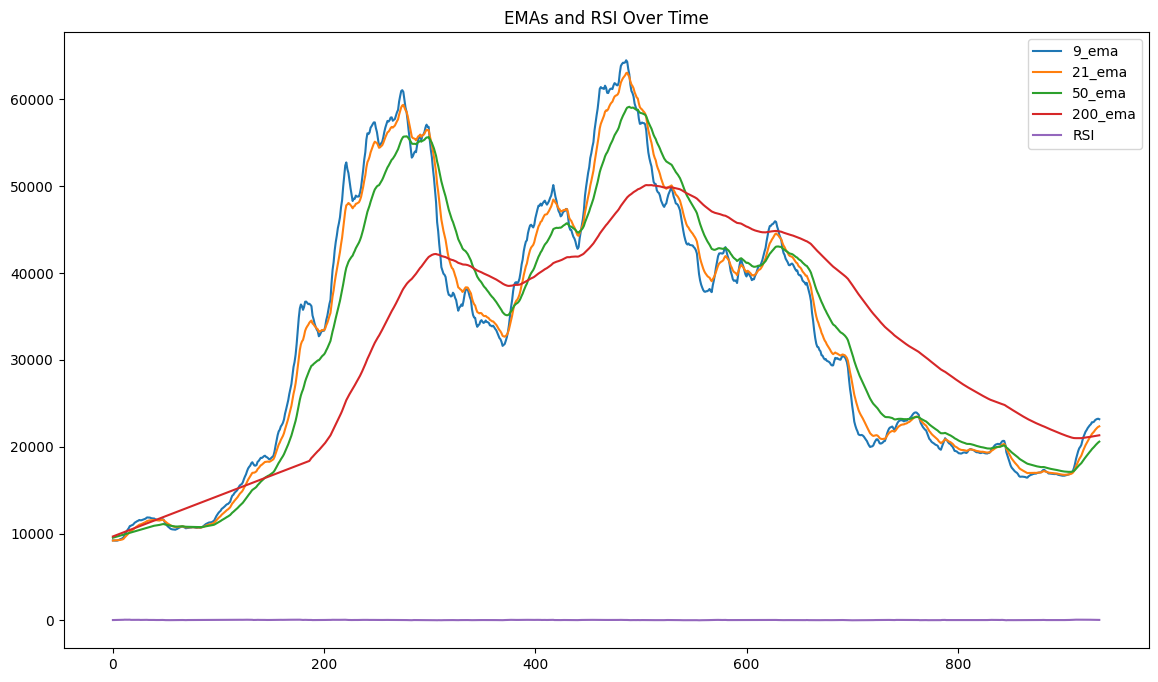

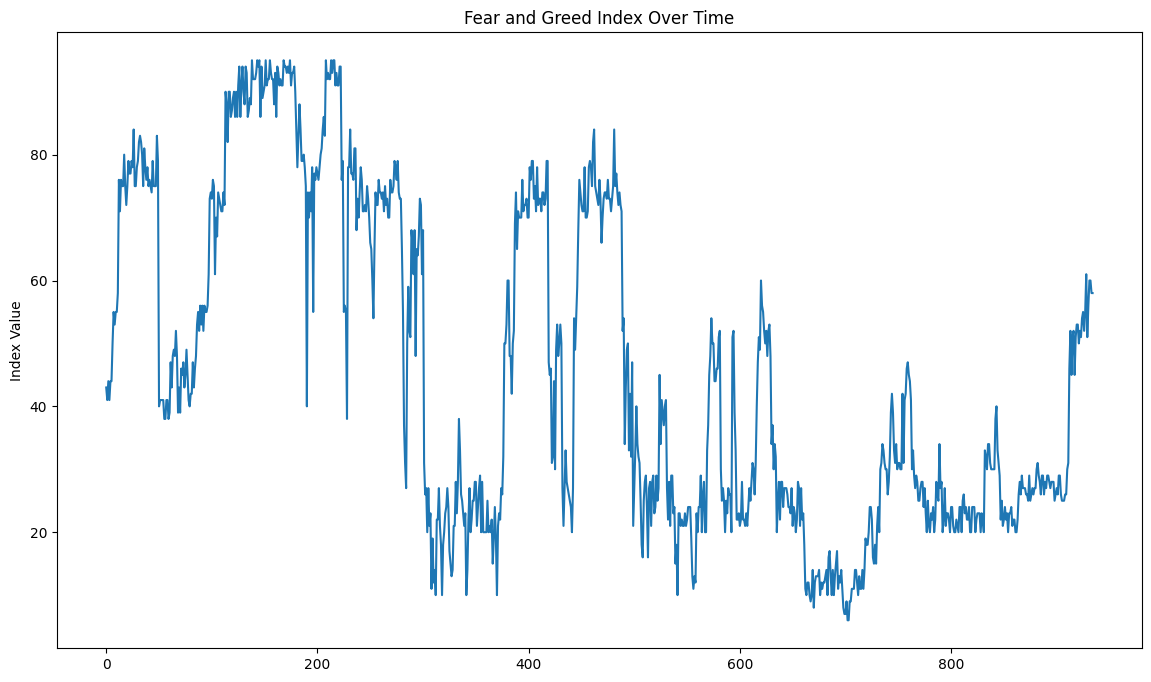

In [10]:
#@title Basic Plots
# Time series plot of 'close' price
df['close'].plot(figsize=(14, 8))
plt.title('Close Price Over Time')
plt.ylabel('Close Price')
plt.show()

# Histogram of 'close' price
df['close'].hist(bins=50, figsize=(10, 6))
plt.title('Close Price Distribution')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

# Volume vs Close Price
plt.figure(figsize=(14, 8))
plt.scatter(df['volume'], df['close'], alpha=0.5)
plt.title('Volume vs Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

# Signal distribution
df['signal'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Trading Signals')
plt.xlabel('Signal')
plt.ylabel('Count')
plt.show()

# EMAs and RSI
df[['9_ema', '21_ema', '50_ema', '200_ema', 'RSI']].plot(figsize=(14, 8))
plt.title('EMAs and RSI Over Time')
plt.show()

# Fear and Greed Index
df['Fear_and_Greed_Index'].plot(figsize=(14, 8))
plt.title('Fear and Greed Index Over Time')
plt.ylabel('Index Value')
plt.show()


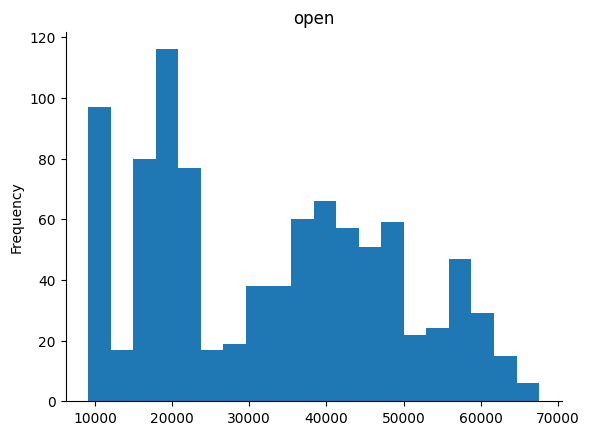

In [7]:
# @title open

from matplotlib import pyplot as plt
df['open'].plot(kind='hist', bins=20, title='open')
plt.gca().spines[['top', 'right',]].set_visible(False)

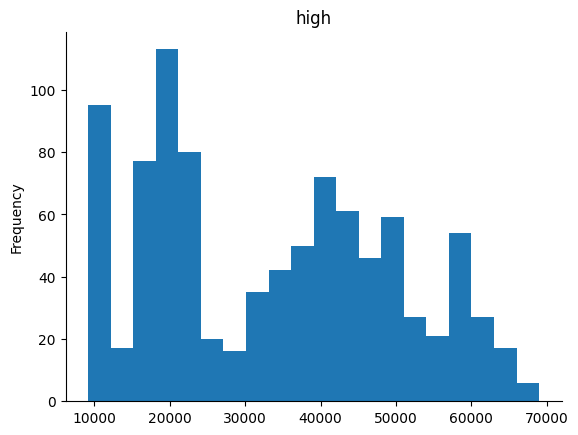

In [13]:
# @title high

from matplotlib import pyplot as plt
df['high'].plot(kind='hist', bins=20, title='high')
plt.gca().spines[['top', 'right',]].set_visible(False)

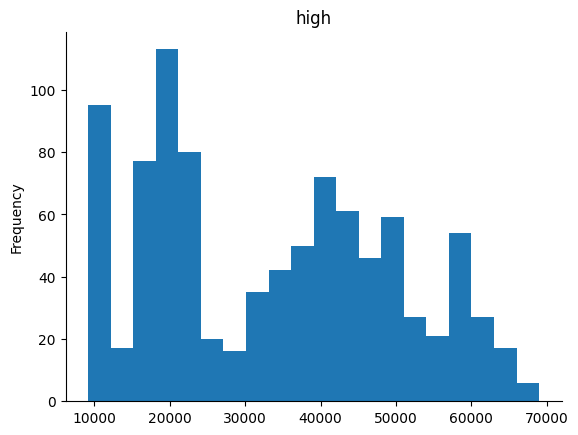

In [15]:
# @title Low

from matplotlib import pyplot as plt
df['high'].plot(kind='hist', bins=20, title='high')
plt.gca().spines[['top', 'right',]].set_visible(False)

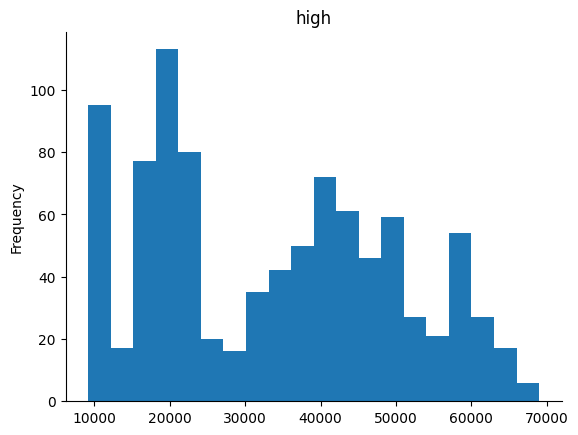

In [16]:
# @title Close

from matplotlib import pyplot as plt
df['high'].plot(kind='hist', bins=20, title='high')
plt.gca().spines[['top', 'right',]].set_visible(False)

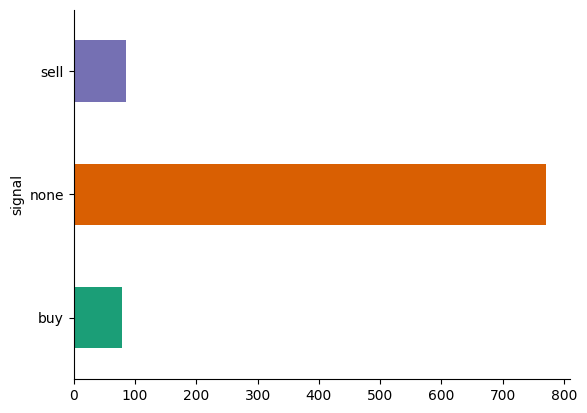

In [29]:
# @title signal

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('signal').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

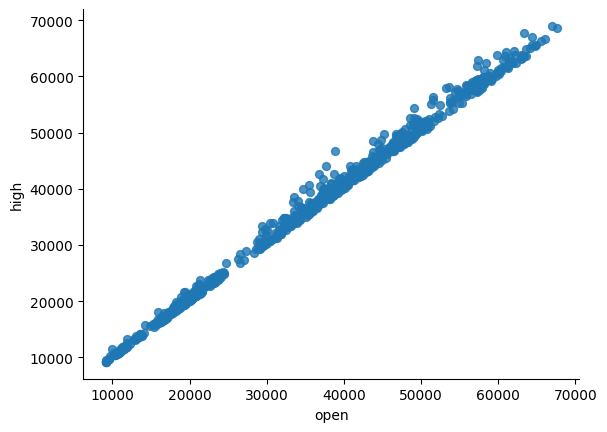

In [30]:
# @title open vs high

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='open', y='high', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

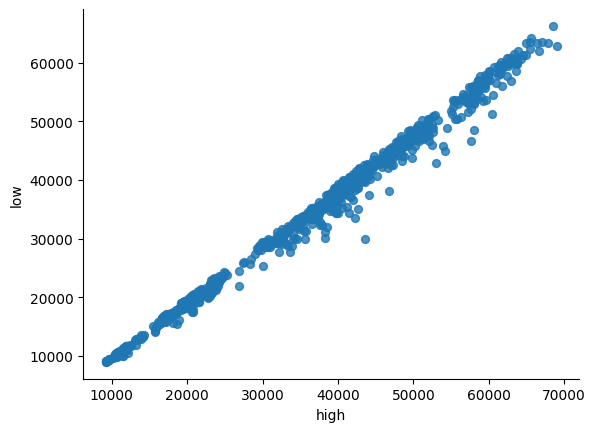

In [31]:
# @title high vs low

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='high', y='low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

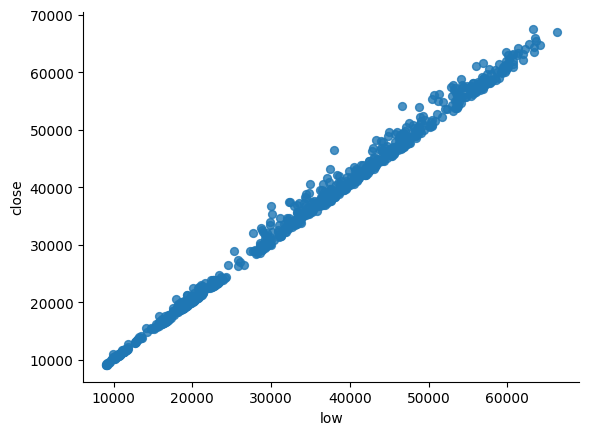

In [57]:
# @title low vs close

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='low', y='close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

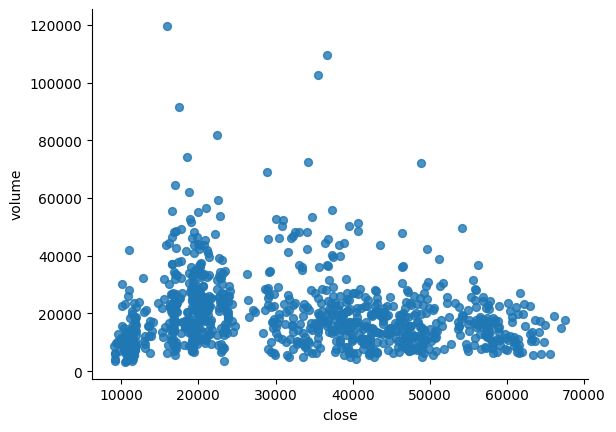

In [54]:
# @title close vs volume

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='close', y='volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

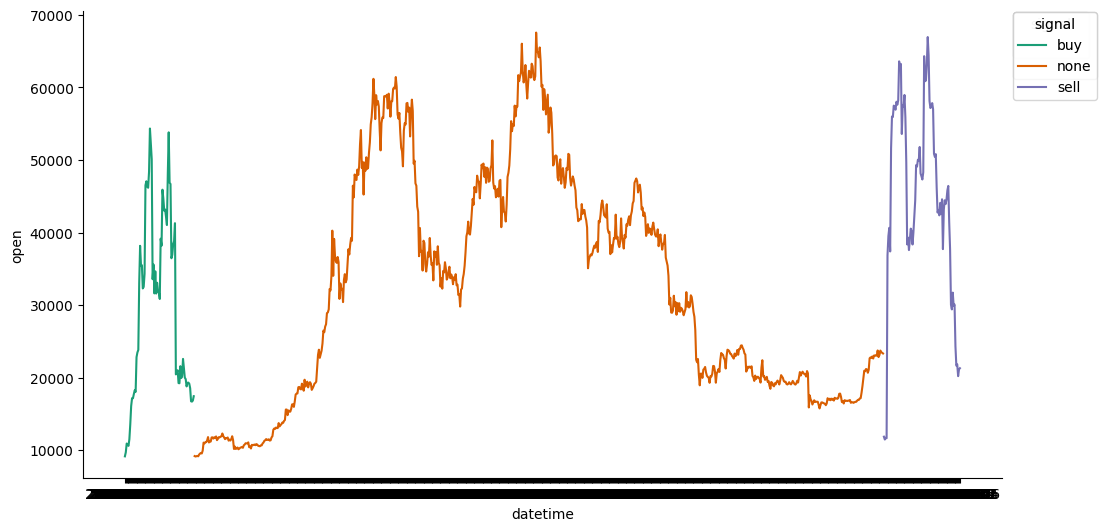

In [51]:
# @title datetime vs open

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['open']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('signal')):
  _plot_series(series, series_name, i)
  fig.legend(title='signal', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('open')

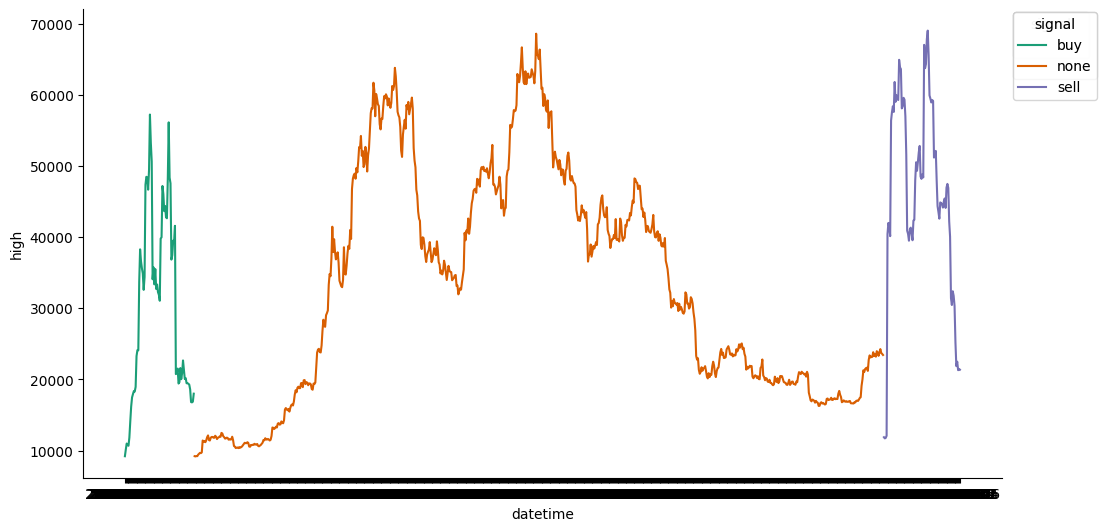

In [48]:
# @title datetime vs high

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['high']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('signal')):
  _plot_series(series, series_name, i)
  fig.legend(title='signal', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('high')

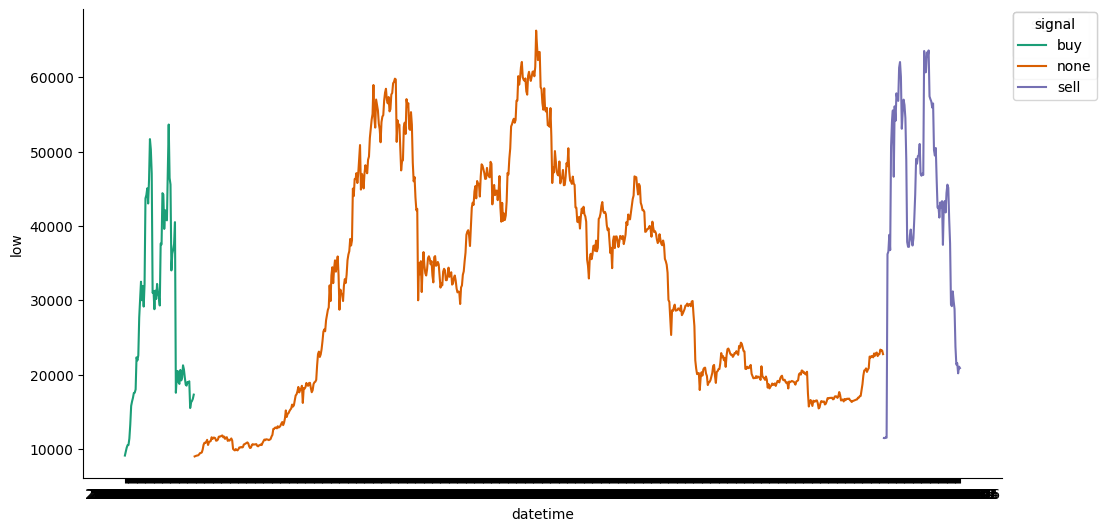

In [40]:
# @title datetime vs low

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['low']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('signal')):
  _plot_series(series, series_name, i)
  fig.legend(title='signal', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('low')

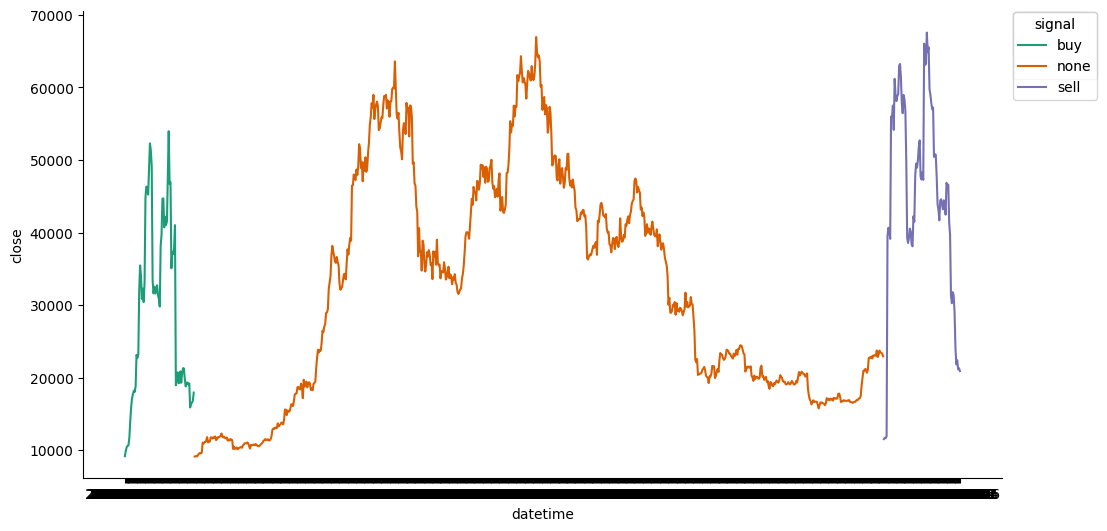

In [38]:
# @title datetime vs close

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('signal')):
  _plot_series(series, series_name, i)
  fig.legend(title='signal', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('close')

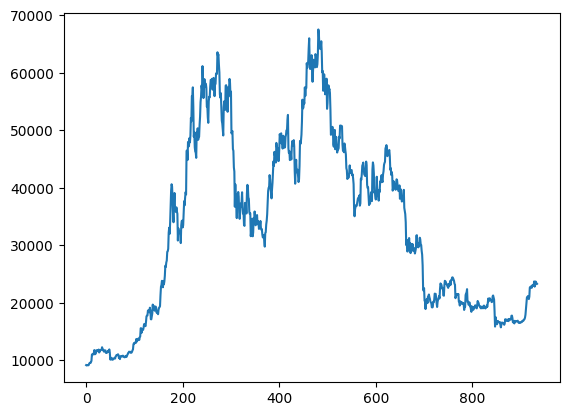

In [23]:
#@title open
plt.plot(df.index, df['open'])
plt.show()

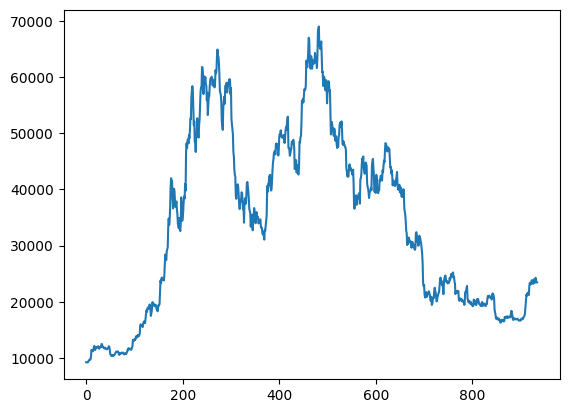

In [27]:
#@title high
plt.plot(df.index, df['high'])
plt.show()

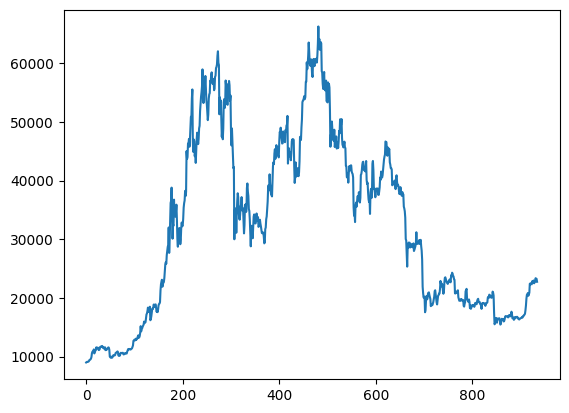

In [28]:
#@title low
plt.plot(df.index, df['low'])
plt.show()

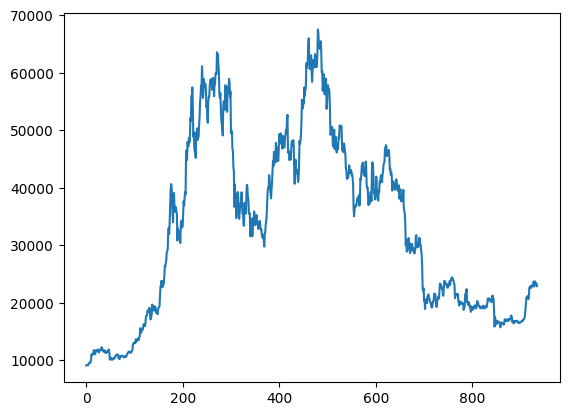

In [37]:
#@title close
plt.plot(df.index, df['close'])
plt.show()

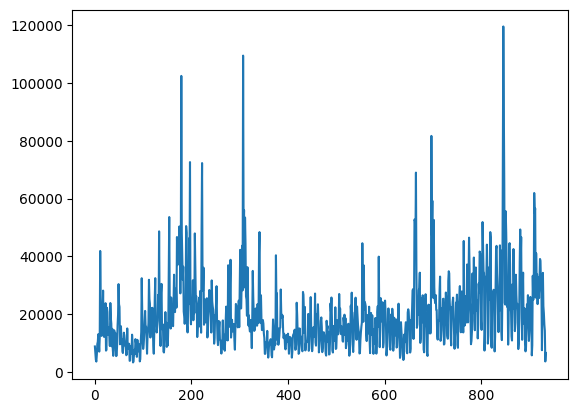

In [24]:
#@title volume
plt.plot(df.index, df['volume'])
plt.show()

<ipython-input-36-1dbc744e43f5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='open', y='signal', inner='box', palette='Dark2')


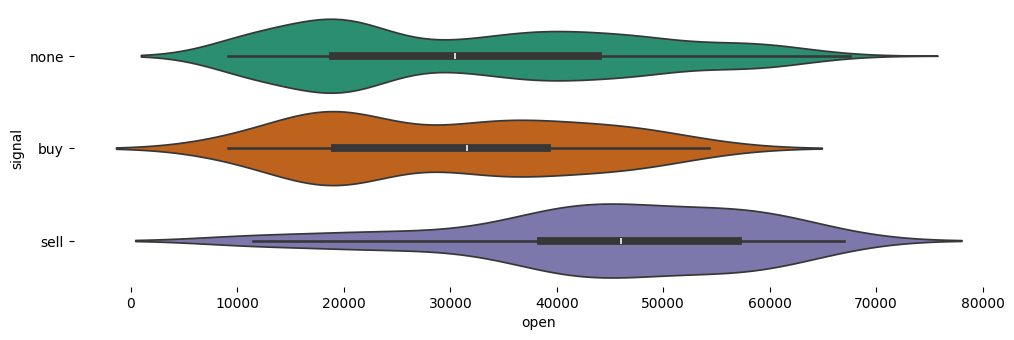

In [36]:
# @title signal vs open

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['signal'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='open', y='signal', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-35-e2a6a5fa15aa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='high', y='signal', inner='box', palette='Dark2')


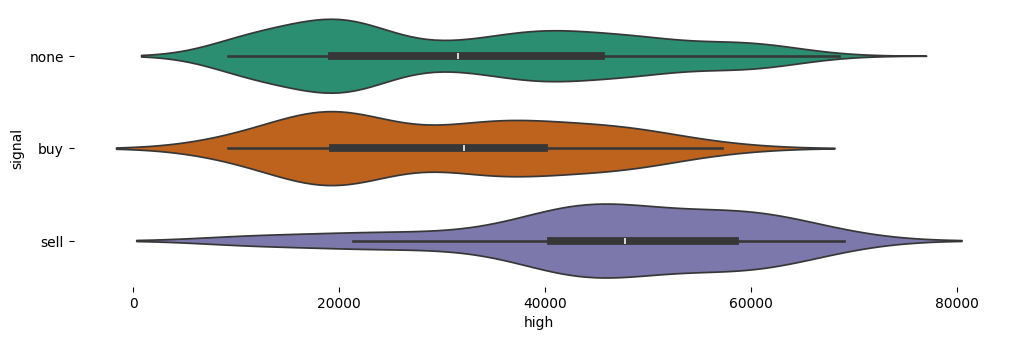

In [35]:
# @title signal vs high

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['signal'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='high', y='signal', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-34-d23c6863179a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='low', y='signal', inner='box', palette='Dark2')


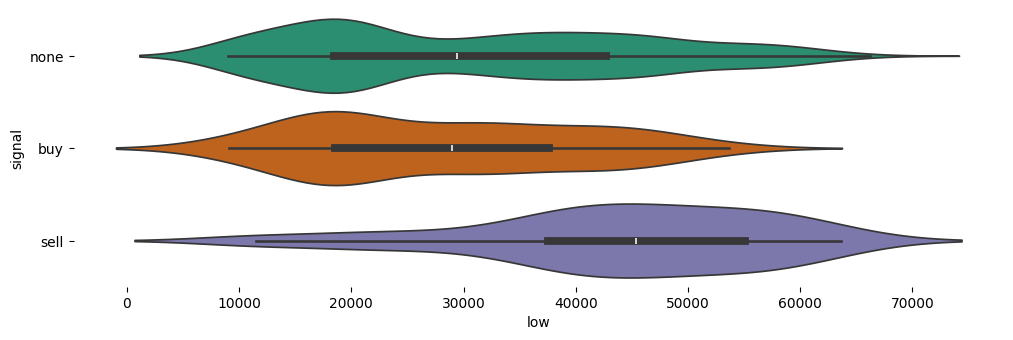

In [34]:
# @title signal vs low

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['signal'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='low', y='signal', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-33-4b791e275956>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='close', y='signal', inner='box', palette='Dark2')


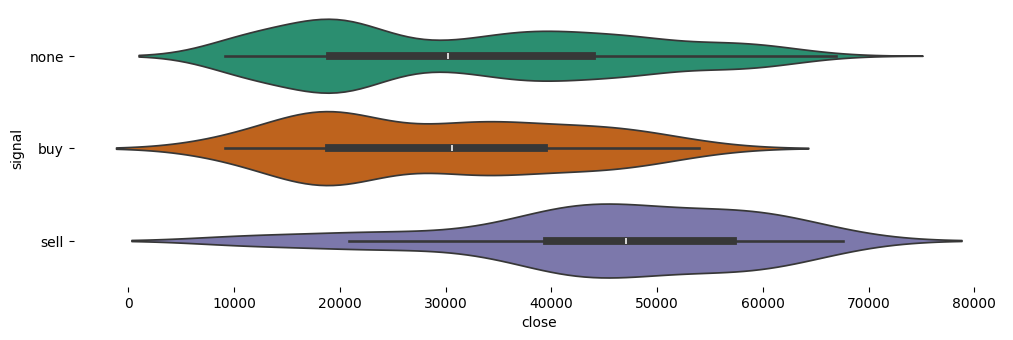

In [33]:
# @title signal vs close

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['signal'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='close', y='signal', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

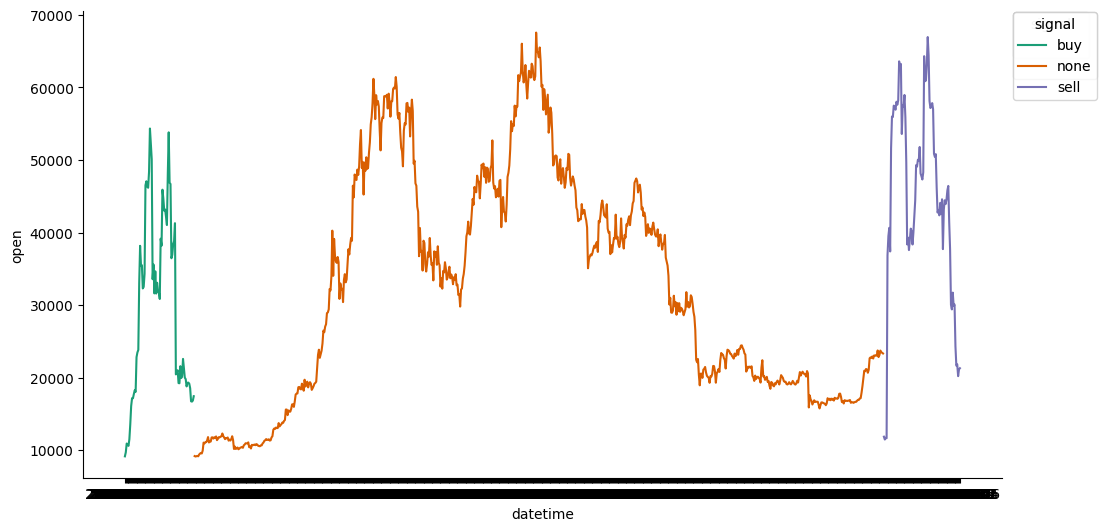

In [19]:
# @title datetime vs open

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['open']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('signal')):
  _plot_series(series, series_name, i)
  fig.legend(title='signal', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('open')

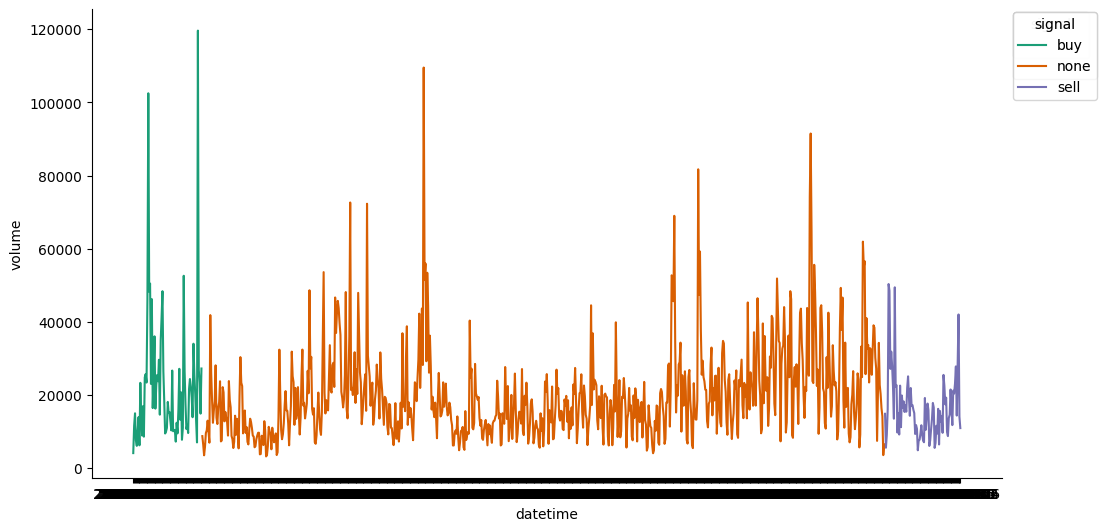

In [43]:
#@title Volume over Time
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['volume']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('signal')):
  _plot_series(series, series_name, i)
  fig.legend(title='signal', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('volume')

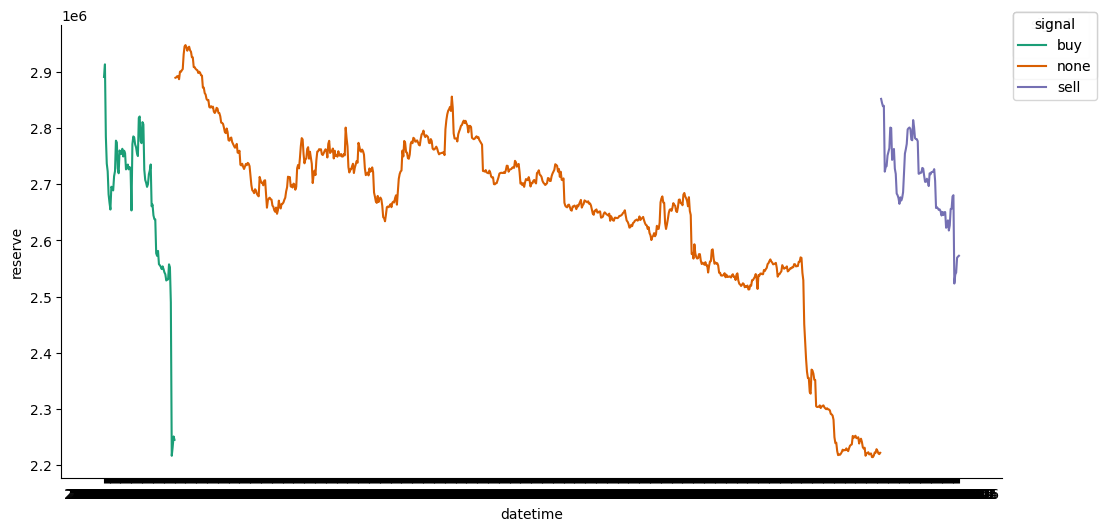

In [44]:
#@title reserve over Time
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['reserve']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('signal')):
  _plot_series(series, series_name, i)
  fig.legend(title='signal', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('reserve')

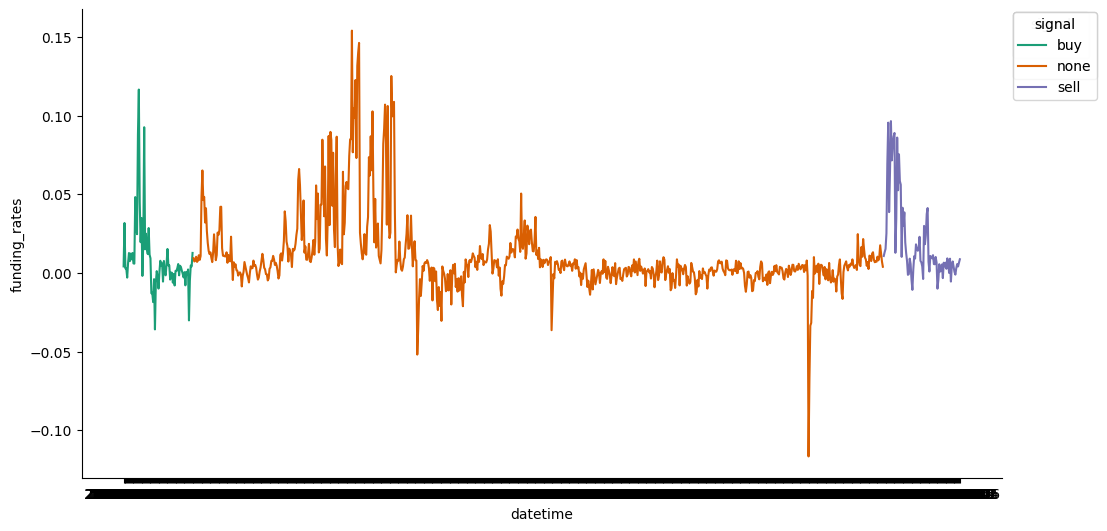

In [46]:
#@title funding_rates over Time
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['funding_rates']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('signal')):
  _plot_series(series, series_name, i)
  fig.legend(title='signal', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('funding_rates')

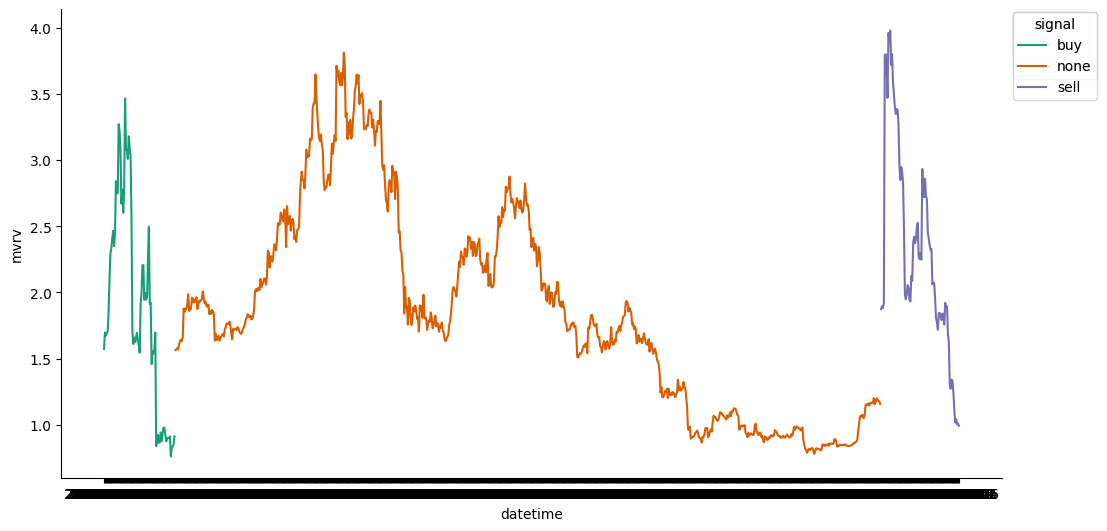

In [47]:
#@title mvrv over Time
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['mvrv']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('signal')):
  _plot_series(series, series_name, i)
  fig.legend(title='signal', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('mvrv')

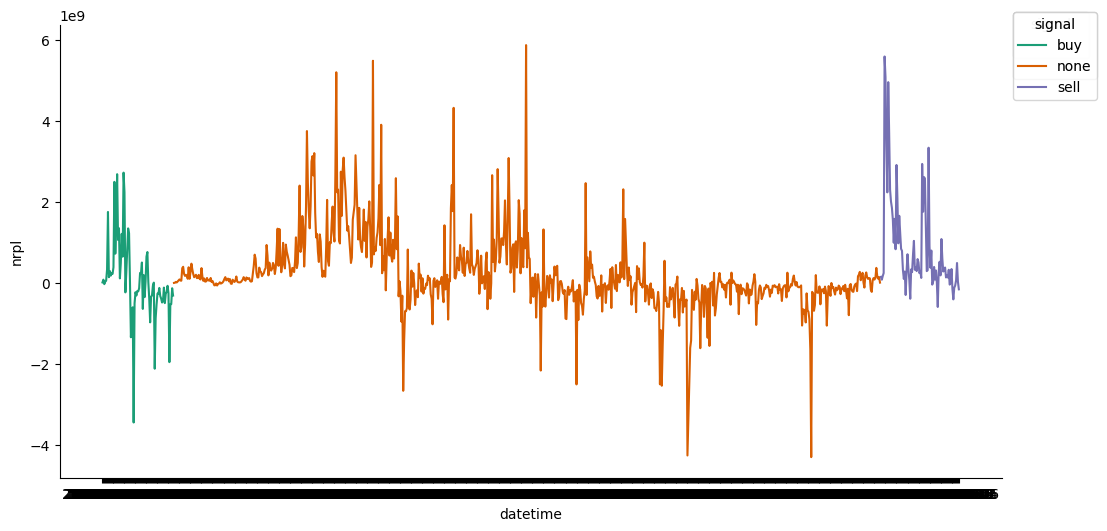

In [49]:
#@title nrpl over Time
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['nrpl']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('signal')):
  _plot_series(series, series_name, i)
  fig.legend(title='signal', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('nrpl')

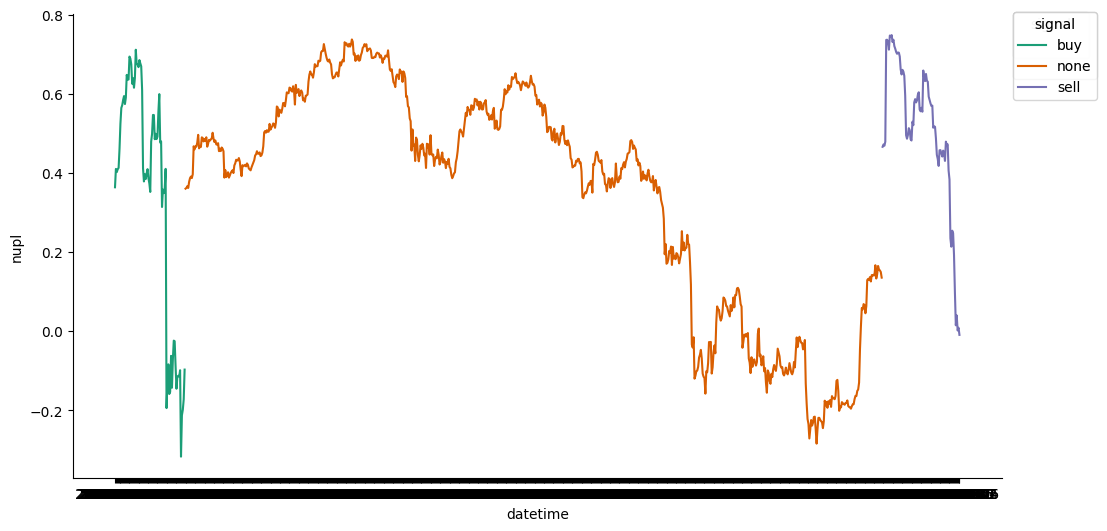

In [50]:
#@title nupl over Time
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['nupl']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('signal')):
  _plot_series(series, series_name, i)
  fig.legend(title='signal', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('nupl')

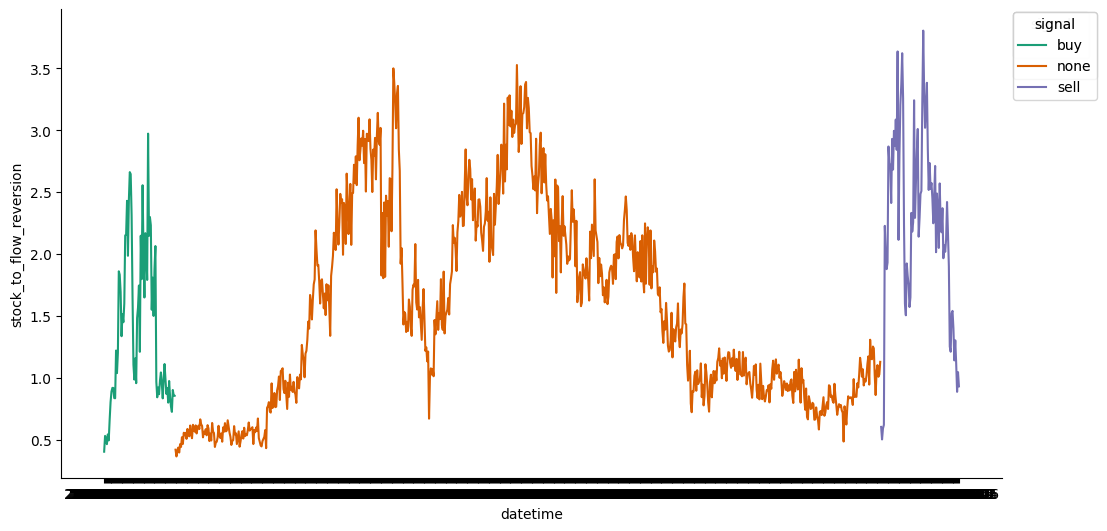

In [52]:
#@title stock_to_flow_reversion over Time
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['stock_to_flow_reversion']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('signal')):
  _plot_series(series, series_name, i)
  fig.legend(title='signal', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('stock_to_flow_reversion')

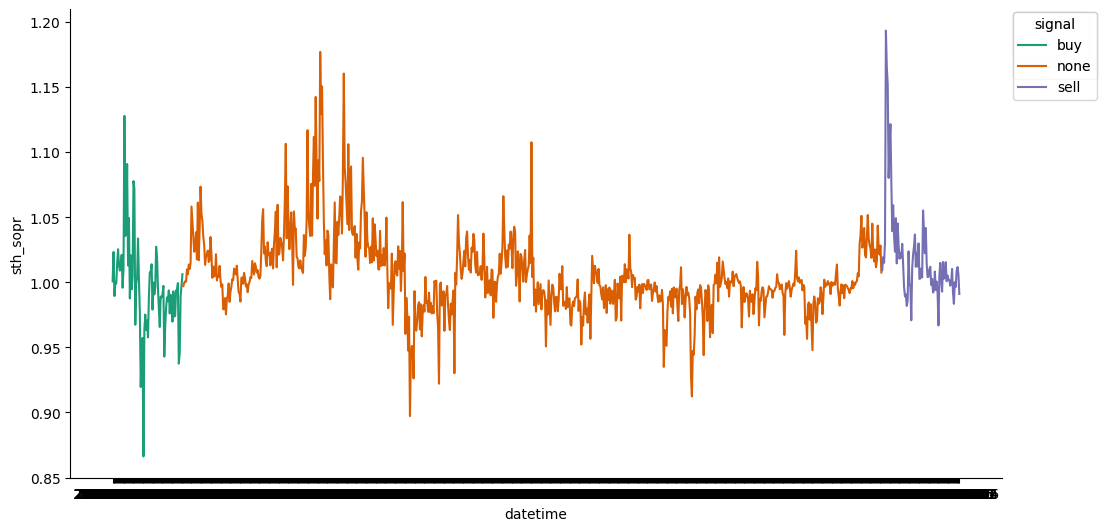

In [53]:
# @title sth_sopr over Time
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['sth_sopr']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('signal')):
  _plot_series(series, series_name, i)
  fig.legend(title='signal', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('sth_sopr')

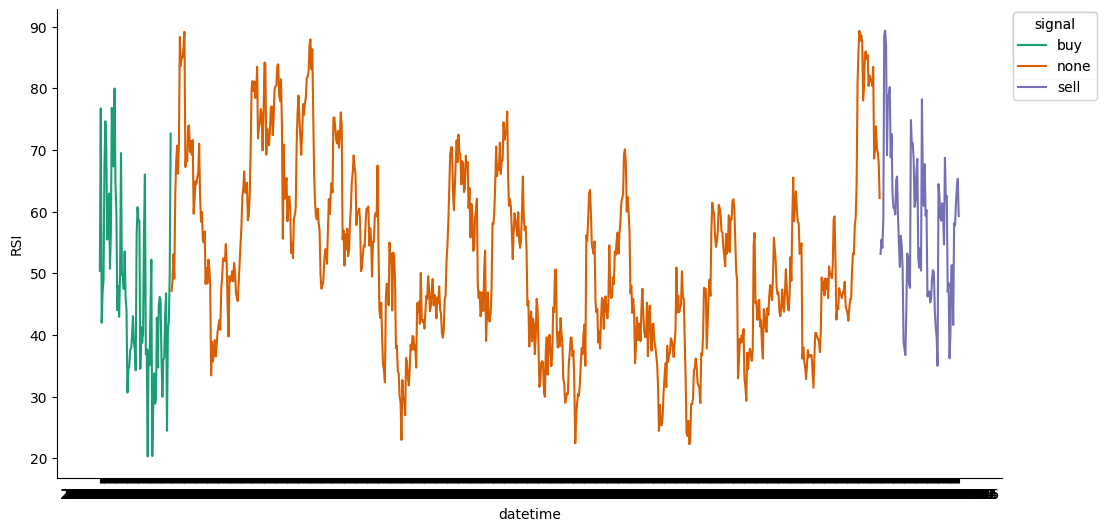

In [55]:
# @title RSI over Time
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['RSI']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('signal')):
  _plot_series(series, series_name, i)
  fig.legend(title='signal', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('RSI')

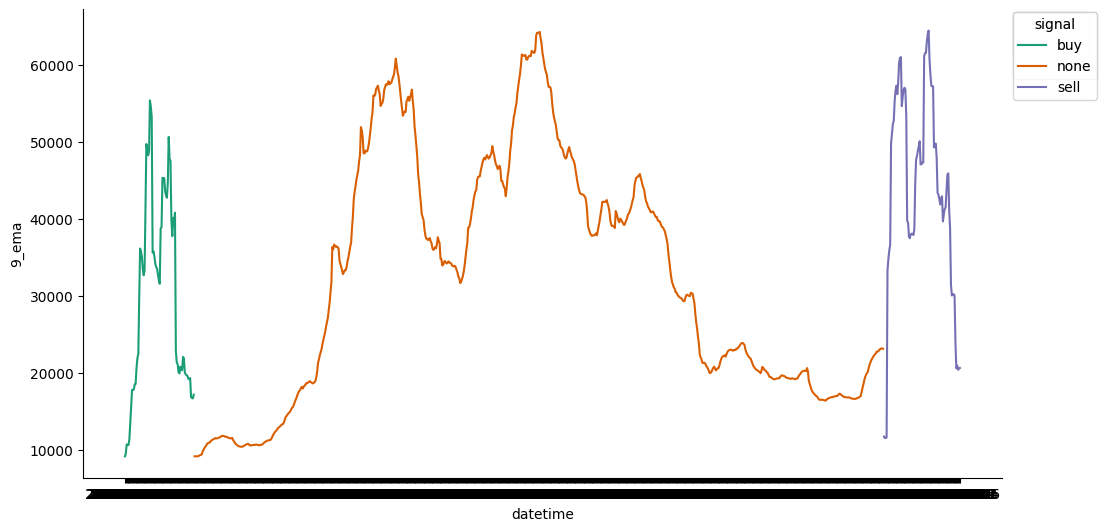

In [56]:
# @title 9_ema over Time
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['9_ema']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('signal')):
  _plot_series(series, series_name, i)
  fig.legend(title='signal', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('9_ema')

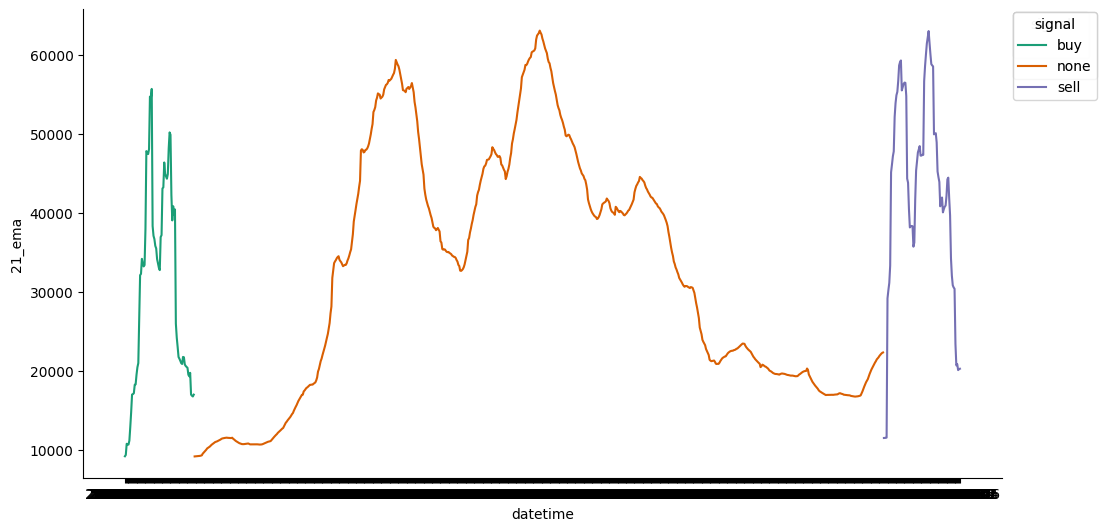

In [13]:
# @title 21_ema over Time

from matplotlib import pyplot as plt
df['high'].plot(kind='hist', bins=20, title='high')
plt.gca().spines[['top', 'right',]].set_visible(False)def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['21_ema']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('signal')):
  _plot_series(series, series_name, i)
  fig.legend(title='signal', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('21_ema')

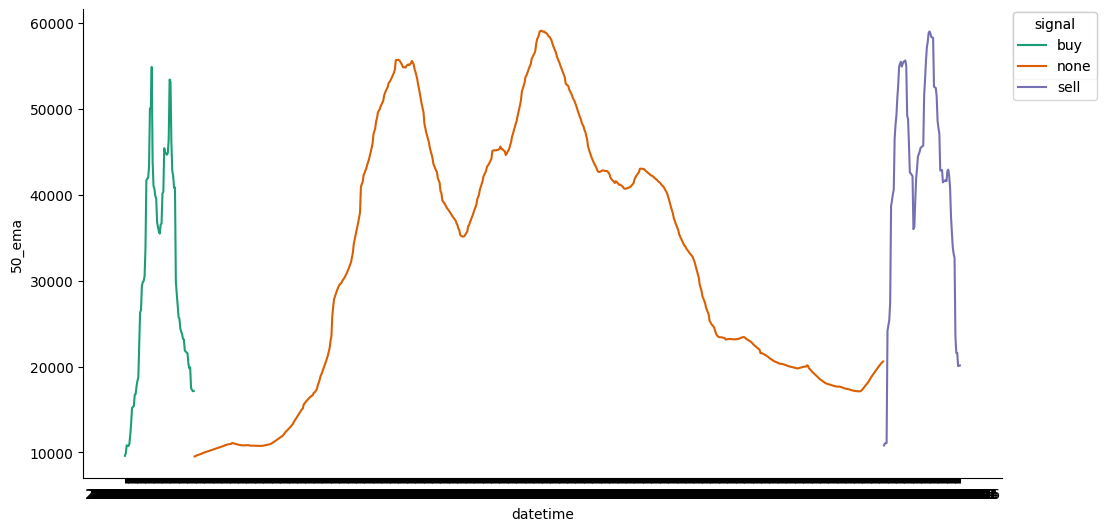

In [11]:
#@title 50_ema over Time
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['50_ema']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('signal')):
  _plot_series(series, series_name, i)
  fig.legend(title='signal', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('50_ema')

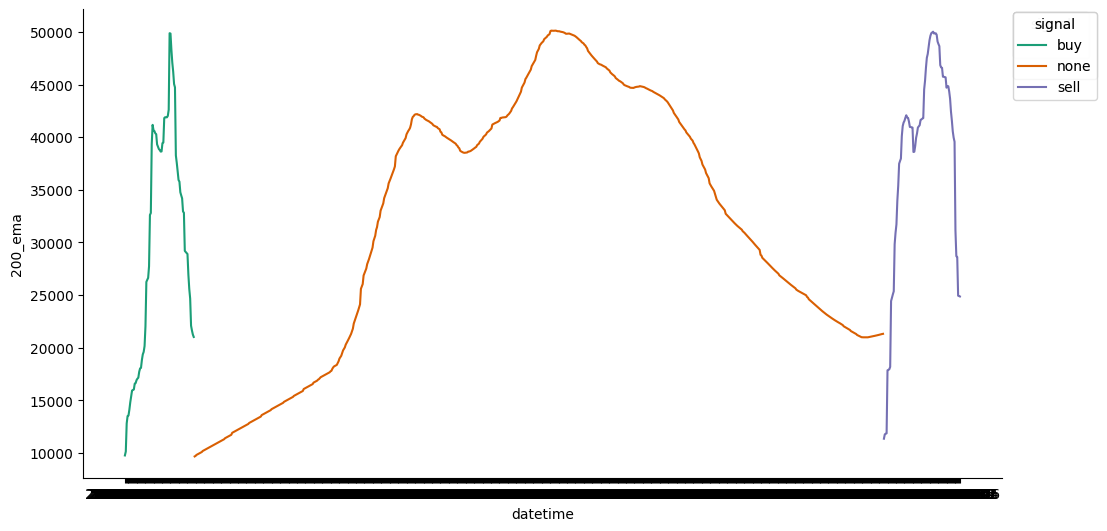

In [60]:
#@title 200_ema over Time
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['200_ema']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('signal')):
  _plot_series(series, series_name, i)
  fig.legend(title='signal', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('200_ema')

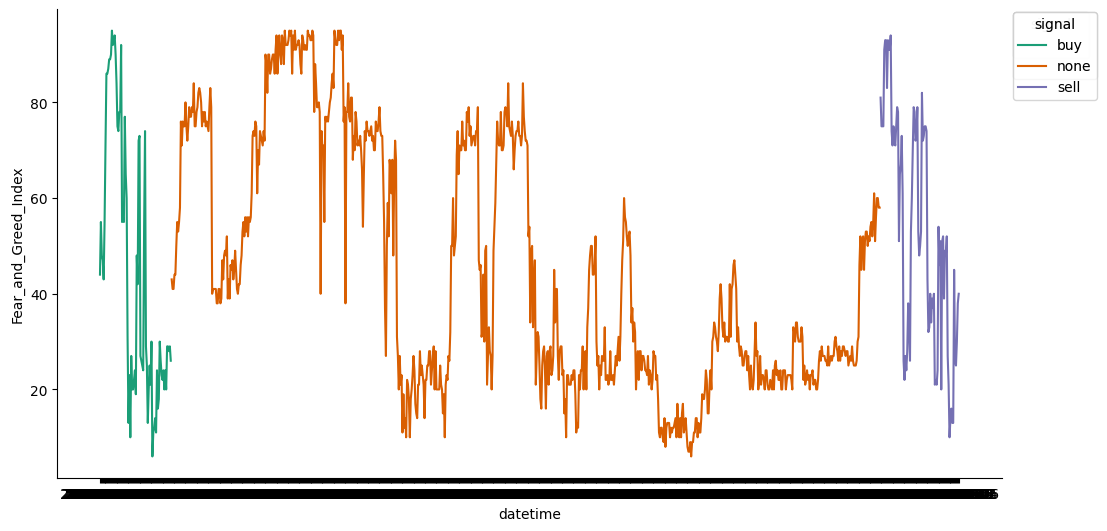

In [61]:
#@title Fear_and_Greed_Index over Time
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['Fear_and_Greed_Index']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('signal')):
  _plot_series(series, series_name, i)
  fig.legend(title='signal', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('Fear_and_Greed_Index')

In [17]:
#@title Feature Selection
# Lagged 'close' price
df['close_lag1'] = df['close'].shift(1)
df['close_lag2'] = df['close'].shift(2)

# Rolling mean of 'close' price
df['close_rolling_mean'] = df['close'].rolling(window=10).mean()

# Example of calculating a technical indicator (Simple Moving Average)
df['SMA_10'] = df['close'].rolling(window=10).mean()


In [18]:
#@title Train Test Split
#Finding total no. of Data
len(df)

935

In [19]:
#@title Check for missing values and convert SIgnal Column to category
# Load the dataset
df = pd.read_csv('data.csv', parse_dates=['datetime'], index_col='datetime')

# Check for missing values and handle them (e.g., drop or fill)
df = df.dropna()

# Convert 'signal' column to categorical for easier handling
df['signal'] = df['signal'].astype('category')


In [20]:
#@title Select Close for Prediction
# Select the 'close' column for prediction
close_price = df['close']


In [21]:
#@title Divide Data into Test(80%) and Train
train_size = int(len(close_price) * 0.8)
train, test = close_price[0:train_size], close_price[train_size:len(close_price)]


In [22]:
#@title Fit the data Into ARIMA Model
from pmdarima import auto_arima

# Fit the ARIMA model
model = auto_arima(train, seasonal=False, error_action='ignore', suppress_warnings=True)
model_fit = model.fit(train)


In [23]:
#@title Model Fitted into Variable
predictions = model_fit.predict(n_periods=len(test))


In [24]:
#@title Find Mean Squared Error
mse = mean_squared_error(test, predictions)
print(f'Test MSE: {mse}')


Test MSE: 17790293.505004823


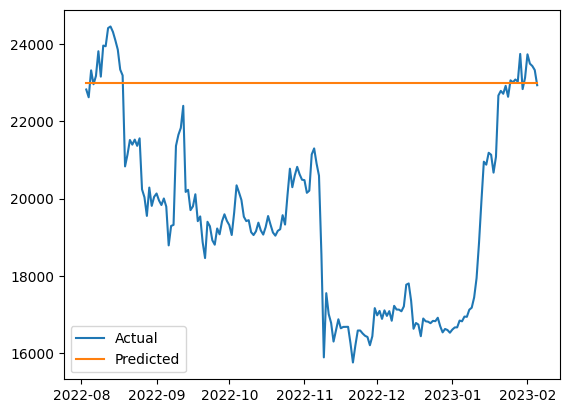

In [25]:
#@title Plot of Actual vs Predicted
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.legend()
plt.show()


In [26]:
#@title Generate Trading Signals
# Assuming 'predictions' is the array of predicted 'close' prices for the test set
# and 'test' is the actual 'close' prices for the test set

# Create a new column in the DataFrame for the predicted signals
df['predicted_signal'] = 'None' # Initialize all signals as 'None'

# Generate signals based on the comparison between predicted and actual 'close' prices
for i in range(len(predictions)):
    if predictions[i] > test[i]:
        df.loc[test.index[i], 'predicted_signal'] = 'Buy'
    elif predictions[i] < test[i]:
        df.loc[test.index[i], 'predicted_signal'] = 'Sell'

# Now, 'df' has a 'predicted_signal' column with 'Buy', 'Sell', or 'None' based on the comparison


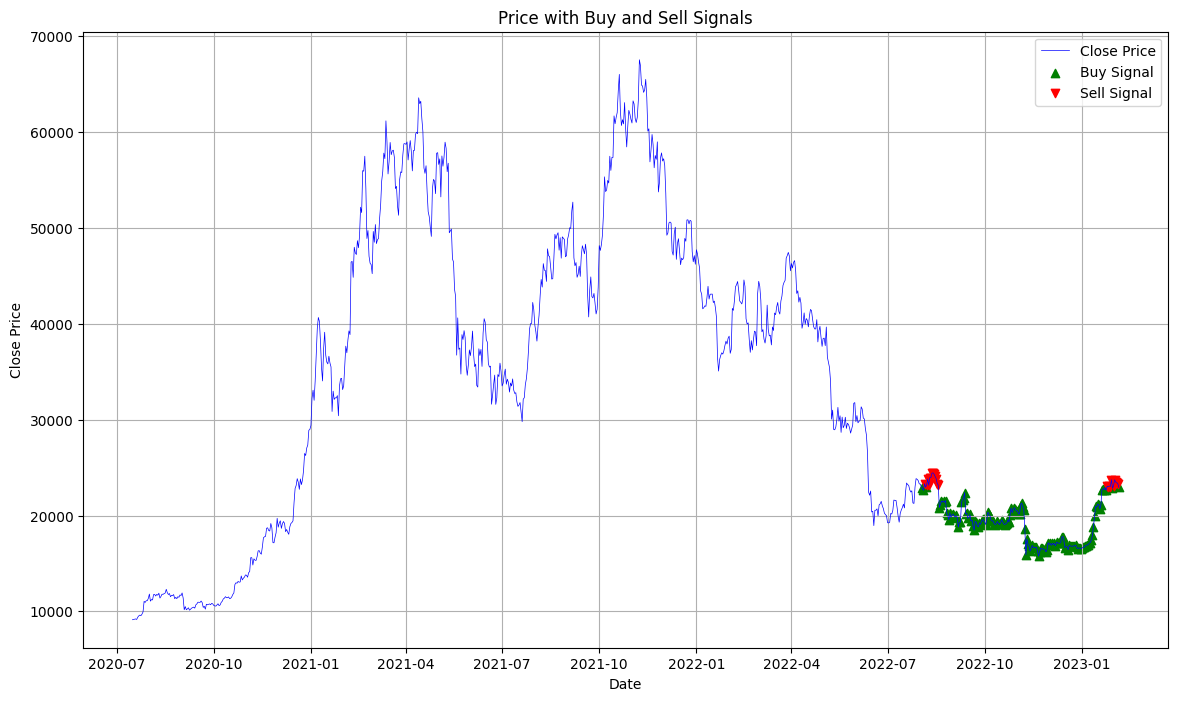

In [28]:
#@title Graph with Buy and Sell Symbol
# Plot the closing prices
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['close'], label='Close Price', linewidth=0.5, color='blue')

# Overlay buy signals
buy_signals = df[df['predicted_signal'] == 'Buy']
plt.scatter(buy_signals.index, buy_signals['close'], color='green', marker='^', alpha=1, label='Buy Signal')

# Overlay sell signals
sell_signals = df[df['predicted_signal'] == 'Sell']
plt.scatter(sell_signals.index, sell_signals['close'], color='red', marker='v', alpha=1, label='Sell Signal')

# Add legend, grid, and labels
plt.legend()
plt.grid()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Price with Buy and Sell Signals')

# Show the plot
plt.show()